In [21]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
import matplotlib.image as img

ori_img = img.imread('./girl.jpg')
print(ori_img.shape)

(429, 640, 3)


In [22]:
#convolution  = conv  >> API 로 연산하자 
# API는 4차원을 입력을 받는다.  (이미지 개수, 세로, 가로, 채널)
# 이미지 SHAPE 의 값을 (429, 640, 3) =>> (1, 429, 640, 3) 변경해준다 

input_img = ori_img.reshape((1,)+ori_img.shape) #투플끼리의 합이어서 
input_img = input_img.astype(np.float32) #현재의 정수값을 =>tf에서 float 처리하기때문에 타입변경 필요 
print(input_img.shape)


(1, 429, 640, 3)


In [23]:
#사이즈(데이터)를 줄여서 처리 좀더 간단하게 하려고  RGB 중 한 채널만 갖고 온다 
ch1_input_img = input_img[:,:,:,0:1] 
#ch1_imput_img = input_img[:,:,:,0]
print(ch1_input_img.shape)

(1, 429, 640, 1)


In [24]:
#필터를 만들자 
filter =np.array([
    [[[1]],[[0]],[[1]]],
    [[[1]],[[0]],[[1]]],
    [[[1]],[[0]],[[1]]]
                ] )
print(filter.shape)


(3, 3, 1, 1)


In [25]:
conv2d = tf.nn.conv2d(
    ch1_input_img, 
    filter,
    strides=[1,1,1,1], #4차원의 4개를 처리해줘야 
    padding='VALID', #패딩을 고려하지 않는다 
)

conv2d_result = conv2d.numpy()
print(conv2d_result.shape)


(1, 427, 638, 1)


covolution 이전 값 
(1, 429, 640, 1)

convolution 이후 값 
(1, 427, 638, 1)

In [26]:
t_img1 = conv2d_result[0,:,:,:]



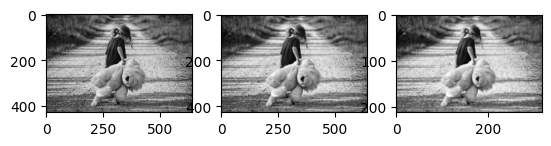

In [27]:
#풀링을 해보자 
#가장 특징이 두드런진 거를 뽑아서 maxpool 

pool = tf.nn.max_pool(
    conv2d_result,
    ksize=[1,3,3,1], #3x3을 넣어주는 것이 목적 
    strides=[1,2,2,1],
    padding='VALID'
)

pool_result = pool.numpy()
#차원이 4개니까 바꿔줘야 함. 
t_img2 = pool_result[0,:,:,:] #첫번째꺼는 안 가져옴 

#이미지 띄우기 
fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
ax1.imshow(ori_img)
ax2.imshow(t_img1,cmap='gray') #우리 데이터는 ..... 
ax3.imshow(t_img2,cmap='gray')

